# Ratings of Yelp Reviews Prediction
#### Yichen Shi, Yanran Wang, Kai Wang

## Part 1: Background & Data Overview
* <font size='+1.5'>Thesis Statement</font>
   * **Background:**  Yelp is an Internet company founded in 2004 to “help people find great local businesses” by providing a platform for users to write reviews of businesses. 

   * **Goal:**  1. find out what makes a review positive or negative based on the review and a small set of attributes; 2. propose a prediction model to predict the ratings of reviews based on the text and said attributes.

* <font size='+1.5'>Dataset:</font>  In the dataset collected in recent years, stars, name, text, date, city, categories, longitude and latitude were recorded for 1,546,379 reviews:

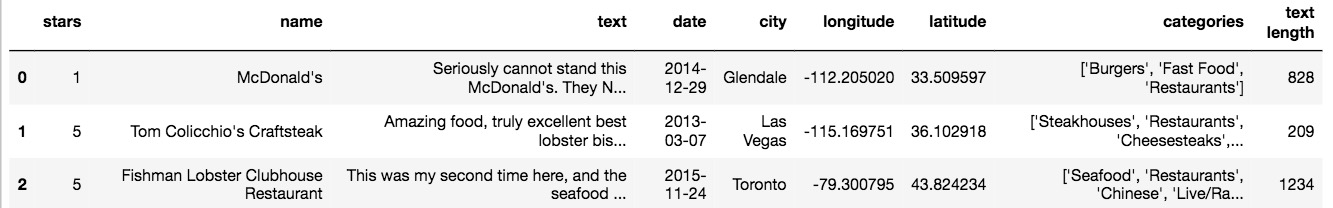

In [3]:
from IPython.display import Image
Image("../Image/head.png")

## Part 2: text Processing & Prediction Model
### 2.1 Text Processing
* Text Processing
    * Remove punctuations
    * Lowercasing every word
    * Extract the word stem
    * Remove stopwords
* Generate corpus from the whole train data and vectorize all texts that comprise a large sparse matrix.
* Dimension Reduction
    * Chi-square test that selects K most informative columns
* Convert following features into numpy arrays and merge into the original sparse matrix
    * The number of specific punctuations and expressions: ‘?’, ’!’, ’:)’, ’:D’, etc.
    * The number of all caps: ‘GOOD’,’NOT’,etc.
    * Text length
### 2.2 Model Fitting

Then we applied different models to select features and do the prediction. By comparing precision of different models on the test set, we get the table below.

We also tried to combine other variables, like longitude, latitude and categories altogether, but there seems no prove to the accuracy of prediction

INFO | KNN |Lasso | Ridge| SVM|Random Forest|Neural Network|GBM|Logistic|Naive Bayes|
------------ | -------------| ------------- |-------------  | ------| ------| -------------| -------------| -------------| -------------
Just Text|1      | 3    | 8    | 5    | 5    | 14(3) | 13(3) | 14| 1
Text and Others   | 18.993 | 16.310| 15.787| 15.954| 16.310| 17.321 | 17.100 | $\approx 16.1$| 18.993

As can be seen in the table Logistic regression performs the best.

## Part 3: Features Processing & Interpretable Model
### 3.1 Feature Processing
### 3.2 Model Fitting

Aparently, texts play an important role in determining whether a review is positive or negative. To discuss the answer of our Goal 1, we plotted word clouds consists of words in texts can mostly indicate a positive or negative review.

**Positive Wordcloud:**

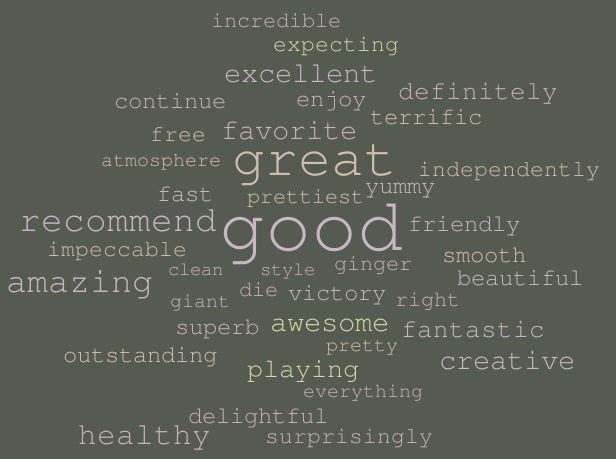

In [2]:
from IPython.display import Image
Image("../Image/5star.png")

**Negative Wordcloud:**

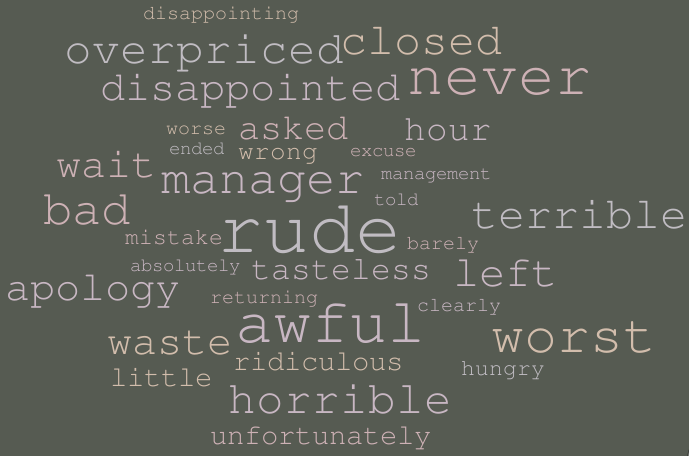

In [1]:
from IPython.display import Image
Image("../Image/1star.png")

## Part 4: Conclusion
1. Strengths
   * Prediction Model: Our prediction model has been chosen for its greatest strength, which is high accuracy and small RMSE, 0.69141 given by Kaggle.
   * -
2. Weaknesses
   * Prediction Model: We've tried much more advanved methods such as Neural Network, however failed to get the final results due to time and device limit. Also, there're more useful ways we could've tried to improve our text processing to get more effective clean data.
   * -
3. Contribution

| Name         | Contibution                                                                     |
|--------------|---------------------------------------------------------------------------------|
| Yichen Shi   | Analyzed data and fitted two models.                                            |
| Yanran Wang  | Analyzed data, made GitHub repo, notebook, and slides for presentation.         |
| Kai Wang     | Analyzed and explored features. Processed data.                                 |